# Tugas Besar IF2220 Probabilitas dan Statistika
### Penarikan Kesimpulan dan Pengujian Hipotesis


### Author
- Vieri Fajar Firdaus / 13521099
- Saddam Annais Shaquille / 13521121

### Inisialisasi library dan data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown, Latex
from scipy import stats
anggur = pd.read_csv('anggur.csv')
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']

### Data Description
- Fixed acidity (keasaman tetap): jumlah asam yang terkandung dalam anggur yang tidak mudah menguap.
- Volatile acidity (keasaman mudah menguap): jumlah asam yang terkandung dalam anggur yang mudah menguap.
- Citric acid (asam sitrat): jumlah asam sitrat yang terkandung dalam anggur.
- Residual sugar (gula sisa): jumlah gula yang tersisa setelah fermentasi selesai.
- Chlorides (klorida): jumlah garam klorida yang terkandung dalam anggur.
- Free sulfur dioxide (sulfur dioksida bebas): jumlah sulfur dioksida bebas yang terkandung dalam anggur.
- Total sulfur dioxide (total sulfur dioksida): jumlah sulfur dioksida total yang terkandung dalam anggur.
- Density (densitas): berat relatif anggur dibandingkan dengan air murni pada 20 derajat Celsius.
- pH: tingkat keasaman pada skala 0 hingga 14.
- Sulphates (sulfat): jumlah sulfat yang terkandung dalam anggur.
- Alcohol (alkohol): persentase alkohol dalam anggur.
- Quality (kualitas): skor kualitas antara 0 dan 10 berdasarkan data sensorik.

### 1. Menuliskan deskripsi statistika (*descriptive statistics*) dari semua kolom pada data yang bersifat numerik, terdiri dari mean, median, modus, standar deviasi, variansi, range, nilai minimum, maksimum, kuartil, IQR (*interquartile range*), *skewness*, dan *kurtosis*.

In [2]:
#untuk mengetahui tipe data dari setiap kolom
display(Markdown('**Tipe data setiap kolom**'))
anggur.info()

**Tipe data setiap kolom**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1000 non-null   float64
 1   volatile acidity      1000 non-null   float64
 2   citric acid           1000 non-null   float64
 3   residual sugar        1000 non-null   float64
 4   chlorides             1000 non-null   float64
 5   free sulfur dioxide   1000 non-null   float64
 6   total sulfur dioxide  1000 non-null   float64
 7   density               1000 non-null   float64
 8   pH                    1000 non-null   float64
 9   sulphates             1000 non-null   float64
 10  alcohol               1000 non-null   float64
 11  quality               1000 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 93.9 KB


In [3]:
display(Markdown('**Deskripsi dari setiap kolom**'))
df=pd.DataFrame()
df['Mean']=anggur.mean()
df['Median']=anggur.median()
df['Standar Deviasi']=anggur.std()
df['Variasi']=anggur.var()
df['Range']=anggur.max()-anggur.min()
df['Kuartil 1']=anggur.quantile(0.25)
df['Kuartil 2']=anggur.quantile(0.5)
df['Kuartil 3']=anggur.quantile(0.75)
df['IQR']=df['Kuartil 3']-df['Kuartil 1']
df['Skewness']=anggur.skew()
df['Kurtosis']=anggur.kurtosis()
df

**Deskripsi dari setiap kolom**

,Mean,Median,Standar Deviasi,Variasi,Range,Kuartil 1,Kuartil 2,Kuartil 3,IQR,Skewness,Kurtosis
fixed acidity,7.152530,7.150000,1.201598,1.443837,8.170000,6.377500,7.150000,8.000000,1.622500,-0.028879,-0.019292
volatile acidity,0.520839,0.524850,0.095848,0.009187,0.665200,0.456100,0.524850,0.585375,0.129275,-0.197699,0.161853
citric acid,0.270517,0.272200,0.049098,0.002411,0.292900,0.237800,0.272200,0.302325,0.064525,-0.045576,-0.104679
residual sugar,2.567104,2.519430,0.987915,0.975977,5.518200,1.896330,2.519430,3.220873,1.324544,0.132638,-0.042980
chlorides,0.081195,0.082167,0.020111,0.000404,0.125635,0.066574,0.082167,0.095312,0.028738,-0.051319,-0.246508
free sulfur dioxide,14.907679,14.860346,4.888100,23.893519,27.267847,11.426717,14.860346,18.313098,6.886381,0.007130,-0.364964
total sulfur dioxide,40.290150,40.190000,9.965767,99.316519,66.810000,33.785000,40.190000,47.022500,13.237500,-0.024060,0.063950
density,0.995925,0.996000,0.002020,0.000004,0.013800,0.994600,0.996000,0.997200,0.002600,-0.076883,0.016366
pH,3.303610,3.300000,0.104875,0.010999,0.740000,3.230000,3.300000,3.370000,0.140000,0.147673,0.080910
sulphates,0.598390,0.595000,0.100819,0.010164,0.670000,0.530000,0.595000,0.670000,0.140000,0.149199,0.064819


In [4]:
display(Markdown('**Deskripsi modus dari setiap kolom**'))
list_mode=[]
for i in range(12) :
    if(len(anggur[anggur.columns[i]].mode())==1000) :
        list_mode.append("Semua data merupakan modus")
    else :
        value=""
        for j in range(len(anggur[anggur.columns[i]].mode())) :
            if(j==len(anggur[anggur.columns[i]].mode())-1) :
                value=value+str(anggur[columns[i]].mode()[j])
            else :
                value=value+str(anggur[columns[i]].mode()[j])+", "
        list_mode.append(value)

df_mode = pd.DataFrame(list_mode, columns =['Modus'],index=anggur.columns) 
df_mode


**Deskripsi modus dari setiap kolom**

,Modus
fixed acidity,6.54
volatile acidity,0.5546
citric acid,0.3019
residual sugar,Semua data merupakan modus
chlorides,Semua data merupakan modus
free sulfur dioxide,Semua data merupakan modus
total sulfur dioxide,"35.2, 37.25, 39.64, 40.61, 41.05, 41.59, 44.51"
density,"0.9959, 0.9961, 0.9965, 0.997"
pH,3.34
sulphates,0.59


### 2. Membuat Visualisasi plot distribusi dalam bentuk histogram dan boxplot untuk setiap kolom numerik.

In [5]:
# Make a function to show the histogram and box plots
def hist_box_plot(df: pd.DataFrame, column: str) -> None:
  fig, (ax1, ax2) =plt.subplots(nrows = 2, ncols = 1, figsize=(10, 5), sharex=True)
  g1 = sns.histplot(data = df, x = column, ax=ax1, color="#03C988", kde = True, line_kws={"linewidth": 1.5, "alpha": 1})
  g1.lines[0].set_color('#DF7857')
  g2 = sns.boxplot(data = df, x = column, ax=ax2, color="#03C988", flierprops={"marker":'o', "markersize":5, "markeredgecolor":'black', "markerfacecolor":'white', "alpha":0.6})
  g1.set(xlabel=None)
  g1.set(ylabel=None)
  g2.set(xlabel=None)
  g2.set(ylabel=None)
  fig.suptitle(column, y = 0.95, fontsize = 17)

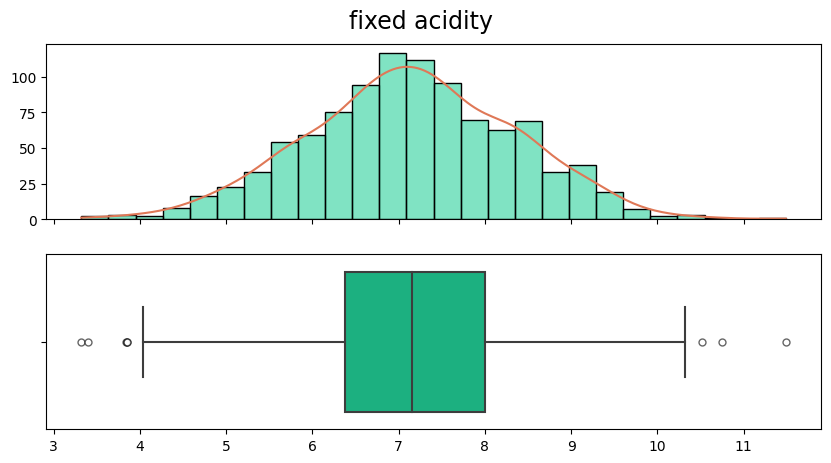

In [6]:
# Untuk kolom fixed acidity
hist_box_plot(anggur, anggur.columns[0])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan condong kiri (*negative skewed*) yang hampir tidak terlihat. 
- Berdasarkan boxplot, terlihat bahwa data fix acidity sangat beragam dengan nilai minimumnya hampir mendekati 4 dan maksimumnya melebihi 10 serta mediannya sedikit di atas 7
- Terdapat beberapa *outliers* yang terlihat di bawah nilai minimum maupun di atas nilai maksimum. 

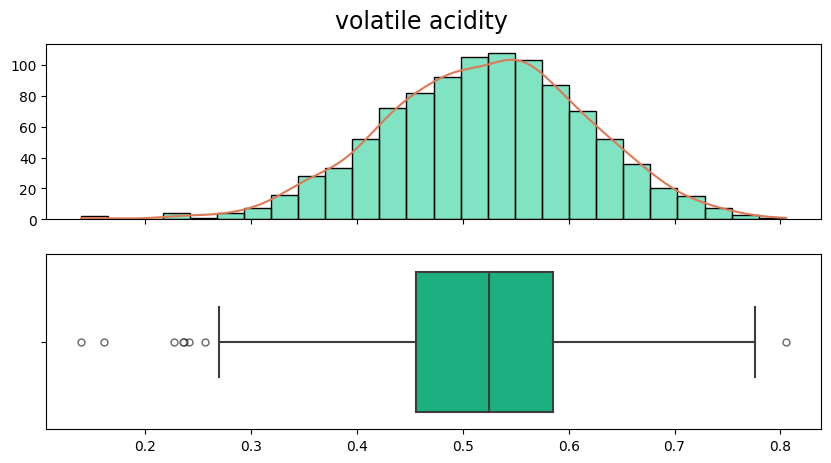

In [7]:
# Untuk kolom volatile acidity
hist_box_plot(anggur, anggur.columns[1])

- Berdasarkan histogram, terlihat bahwa data terdistribusi secara normal dengan sedikit condong kanan (*positive skewed*). 
- Berdasarkan boxplot, terlihat bahwa data *volatile acidity* memiliki rentang yang cukup kecil.
- Nilai minimumnya kurang dari 0.3 dan maksimumnya kurang dari 0.8 serta mediannya sedikit di atas 0.5.
- Terdapat 1 *outliers* yang terlihat di atas nilai maksimum dan beberapa lainnya di bawah nilai minimum. 

### 3. Menentukan setiap kolom numerik berdistribusi normal atau tidak. Gunakan normality test yang dikaitkan dengan histogram plot.

In [25]:
def normality(column):
    k2,p = stats.normaltest(anggur[column])
    alpha = 5e-2
    display(Markdown("Nilai *D'Agostino's K-squared Test*, p = {:g}".format(p)))
    if p < alpha:  
        display(Markdown(f"Karena $p < {alpha}$, maka data kolom {column} normal"))
    else:
        display(Markdown(f"Karena $p > {alpha}$, maka data kolom {column} normal"))
    fig, ax1 =plt.subplots(nrows=1,ncols = 1, figsize=(10, 2.5), sharex=True)
    g1 = sns.histplot(data = anggur, x = column, ax=ax1, color="#03c9c9", kde = True, line_kws={"linewidth": 1.5, "alpha": 1})
    g1.lines[0].set_color('#c91703')
    g1.set(ylabel=None)
    g1.set(xlabel=None)
    fig.suptitle("Normality test ", y =1, fontsize = 17)


Nilai *D'Agostino's K-squared Test*, p = 0.930858

Karena $p > 0.05$, maka data kolom fixed acidity normal

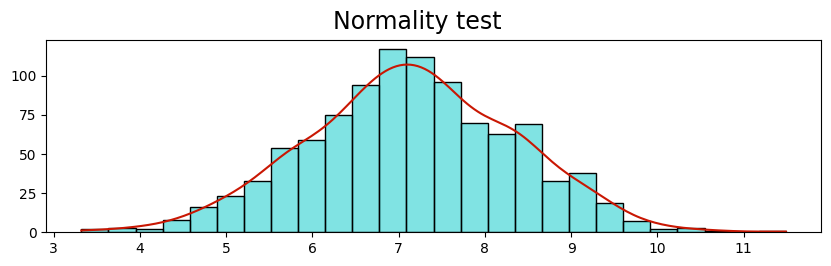

In [26]:
normality(anggur.columns[0])

Nilai *D'Agostino's K-squared Test*, p = 0.930858

Data kolom fixed acidity tidak normal

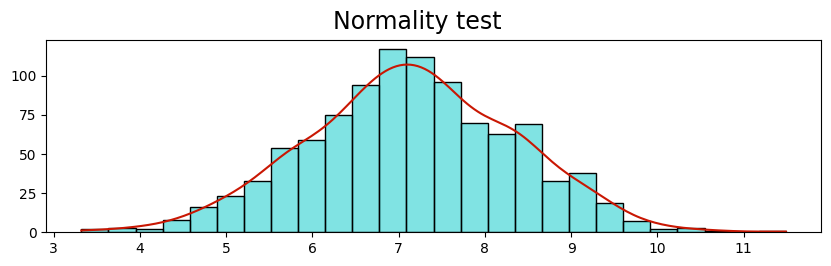

In [10]:
normality(anggur.columns[0])

Nilai *D'Agostino's K-squared Test*, p = 0.0225815

Data kolom volatile acidity normal

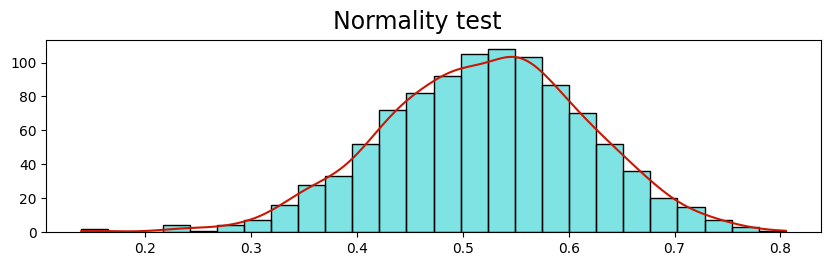

In [11]:
normality(anggur.columns[1])

Nilai *D'Agostino's K-squared Test*, p = 0.68169

Data kolom citric acid tidak normal

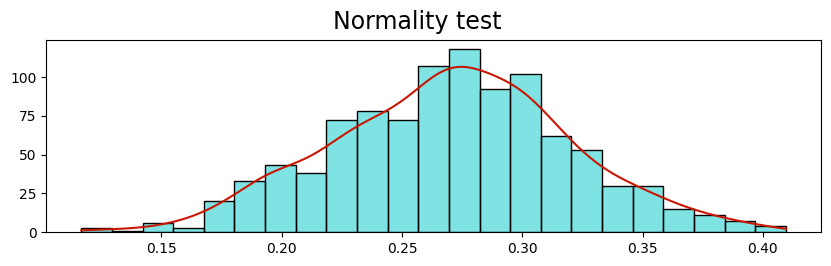

In [12]:
normality(anggur.columns[2])

Nilai *D'Agostino's K-squared Test*, p = 0.224667

Data kolom residual sugar tidak normal

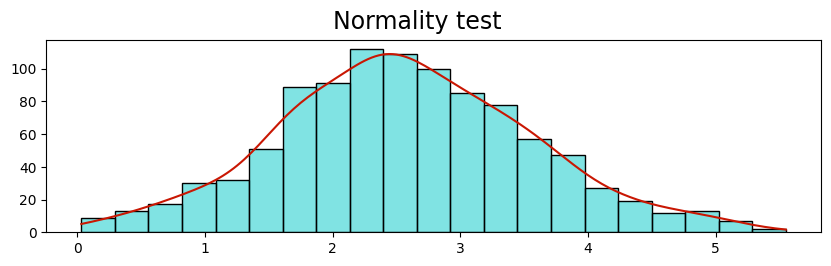

In [13]:
normality(anggur.columns[3])

Nilai *D'Agostino's K-squared Test*, p = 0.170483

Data kolom chlorides tidak normal

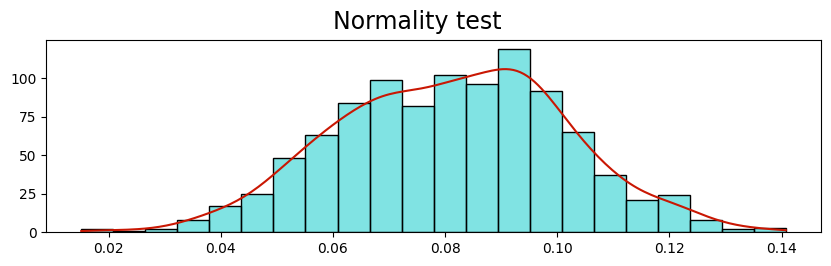

In [14]:
normality(anggur.columns[4])

Nilai *D'Agostino's K-squared Test*, p = 0.0174304

Data kolom free sulfur dioxide normal

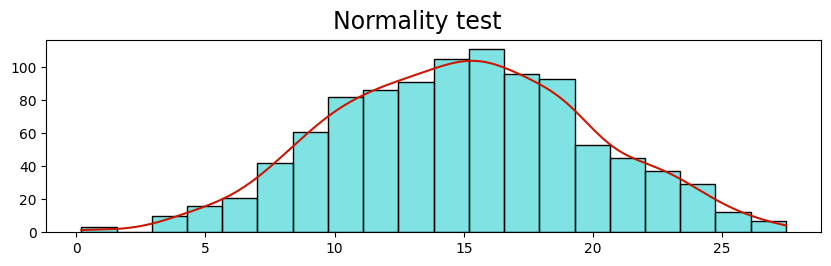

In [15]:
normality(anggur.columns[5])

Nilai *D'Agostino's K-squared Test*, p = 0.848885

Data kolom total sulfur dioxide tidak normal

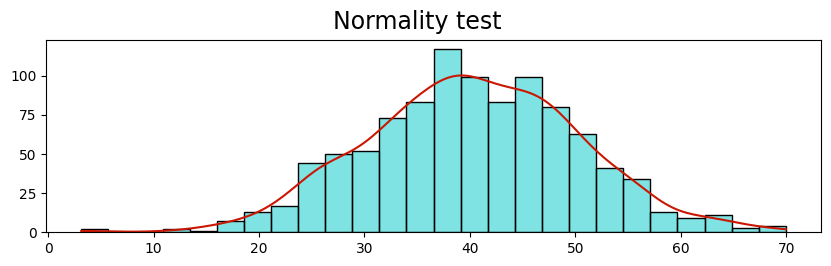

In [16]:
normality(anggur.columns[6])

Nilai *D'Agostino's K-squared Test*, p = 0.598523

Data kolom density tidak normal

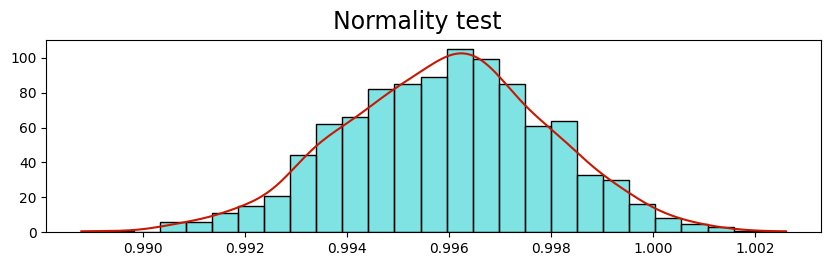

In [17]:
normality(anggur.columns[7])

Nilai *D'Agostino's K-squared Test*, p = 0.136787

Data kolom pH tidak normal

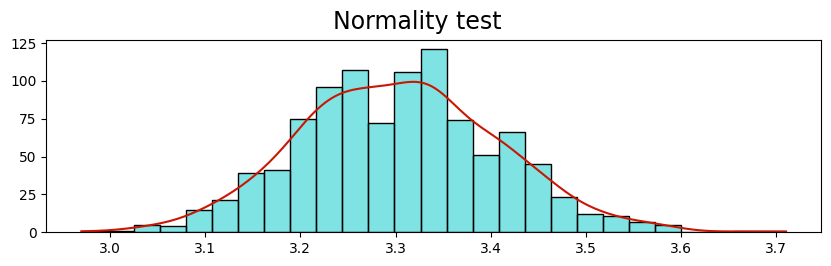

In [18]:
normality(anggur.columns[8])

Nilai *D'Agostino's K-squared Test*, p = 0.138843

Data kolom sulphates tidak normal

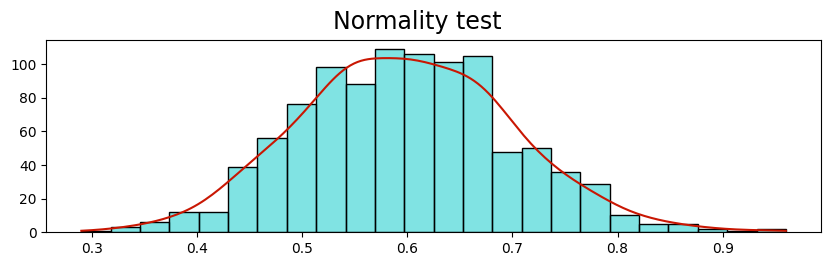

In [19]:
normality(anggur.columns[9])

Nilai *D'Agostino's K-squared Test*, p = 0.679088

Data kolom alcohol tidak normal

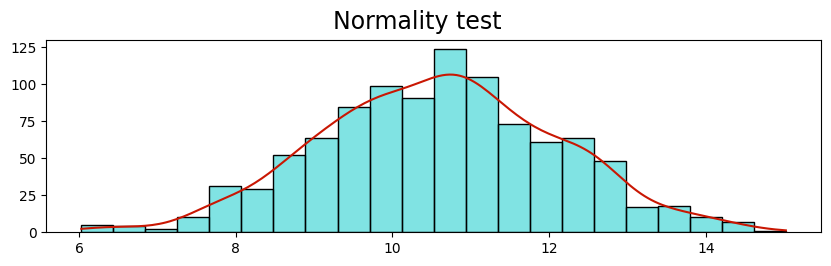

In [20]:
normality(anggur.columns[10])

Nilai *D'Agostino's K-squared Test*, p = 0.388814

Data kolom quality tidak normal

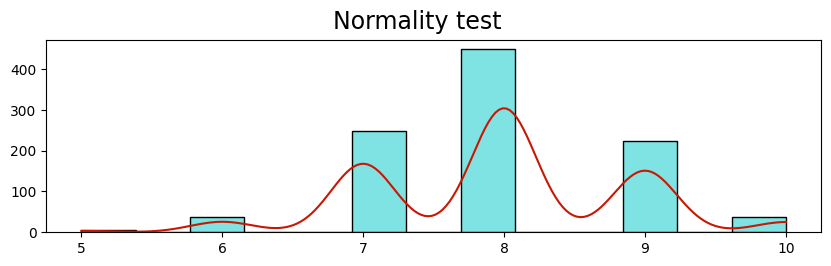

In [21]:
normality(anggur.columns[11])

### 4. Melakukan test hipotesis 1 sampel, dengan menuliskan 6 langkah testing dan menampilkan juga boxplotnya untuk kolom/bagian yang bersesuaian.

#### Langkah Testing : 
1. Tentukan Hipotesis nol ($H_0: \theta = \theta_0$), dimana $\theta$ bisa berupa $\theta$, $\theta$, $p$, atau data lain berdistribusi tertentu(Normal, binomial, dsc.)
2. Pilih hipotesis alternatif $H_1$ salah dari dari $\theta > \theta_0$ , $\theta < \theta_0$ , atau $\theta \neq \theta_0$
3. Tentukan tingkat signifikan $\alpha$
4. Tentukan uji statistik yang sesuai dan tentukan daerah kritis.
5. Hitung nilai uji statistik dari data sample. Hitung *p-value* sesuai dengan uji statistik yang
digunakan.
6. Ambil keputusan dengan TOLAK $H_0$ jika nilai uji terletak di daerah kritis atau dengan tes signifikan, TOLAK $H_0$ jika *p-value* lebih kecil dibanding tingkat signifikansi $\alpha$ yang diinginkan

In [22]:
def hipotesis_1(data,keterangan,batas) :
    #keterangan untuk lebih dari, kurang dari, sama dengan, proporsi
    #batas merupakan nilai yang menjadi batas uji
    H0="μ="+str(batas)

    if(keterangan=="lebih dari") :
        H1="μ>"+str(batas)
        alpa=0.05
        print("uji single right tailed")
        z,p=ztest(data, value=batas, alternative='larger')
        za=st.norm.ppf(1-alpa)
        
    elif(keterangan=="kurang dari") :
        keterangan="<"
    elif(keterangan=="sama dengan") :
        keterangan="=="
    elif(keterangan=="proporsi") :

SyntaxError: unexpected EOF while parsing (3309917691.py, line 17)